# CPS305 Fall 2019
## Lab 6 Report
## Jeremy Ng, Std ID 500882192

27 10 2019

# Introduction and Overall Comments

I had trouble getting timeit to work.

## Solution for exercise 1

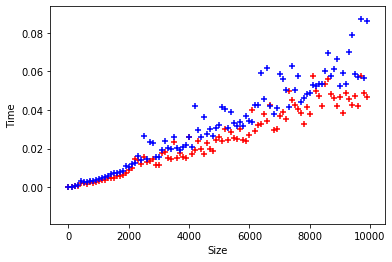

In [2]:
import matplotlib.pyplot as plot
import timeit
import random


def quickSort(alist) :
    quickSortHelper(alist, 0, len(alist) - 1)


def quickSortHelper(alist, first, last) :
    if first < last :

        splitpoint = partition(alist, first, last)

        quickSortHelper(alist, first, splitpoint - 1)
        quickSortHelper(alist, splitpoint + 1, last)


def partition(alist, first, last) :
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done :

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue :
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark :
            rightmark = rightmark - 1

        if rightmark < leftmark :
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp

    return rightmark


def mo3_quickSort(alist) :
    mo3_quickSortHelper(alist, 0, len(alist) - 1)


def mo3_quickSortHelper(alist, first, last) :
    if first < last :

        splitpoint = mo3_partition(alist, first, last)

        mo3_quickSortHelper(alist, first, splitpoint - 1)
        mo3_quickSortHelper(alist, splitpoint + 1, last)


def mo3_partition(alist, first, last) :

    array = [alist[first], alist[len(alist) // 2], alist[last]]

    if (array[1] > array[0] and array[1] < array[2]) or (array[1] > array[2] and array[1] < array[0]) :
        alist[first] = array[1]
        alist[((last - first) // 2 + first)] = array[0]
        pivotvalue = array[1]

    elif (array[2] > array[0] and array[2] < array[1]) or (array[2] > array[1] and array[2] < array[0]) :
        alist[first] = array[2]
        alist[last] = array[0]
        pivotvalue = array[2]
    else :
        pivotvalue = array[0]

    leftmark = first + 1
    rightmark = last

    done = False
    while not done :

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue :
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark :
            rightmark = rightmark - 1

        if rightmark < leftmark :
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp

    return rightmark

size = []
quickSortTime = []
mo3_quickSortTime = []

count = 10000
for n in range(0, count, 100) :
    size.append(n)
    array1 = []
    array2 = []

    for i in range(n) :
        number = random.randrange(1000000)
        array1.append(number)
        array2.append(number)

    timer1 = timeit.Timer("quickSort(array1)",
                          "from __main__ import quickSort, array1")
    timer2 = timeit.Timer("mo3_quickSort(array2)",
                          "from __main__ import mo3_quickSort, array2")

    quickSortTime.append(timer1.timeit(number = 1))
    mo3_quickSortTime.append(timer2.timeit(number = 1))

plot.scatter(size, quickSortTime, color = 'r', marker = '+')
plot.scatter(size, mo3_quickSortTime, color = 'b', marker = '+')
plot.xlabel("Size")
plot.ylabel("Time")
plot.show()

**Discussion of the Results**

I generated arrays of various sizes to send through quickSort() and mo3_quickSort(). I used timeit to record the time and plotted it with matplotlib.

The graph shows that quickSort() and mo3_quickSort() are very similar with order of magnitude O(nlogn).

## Solution for Exercise 2

In [3]:
import unittest
from sorting import mo3_quickSort

class tester(unittest.TestCase) :
    def testNormal(self) :
        list = [5, 4, 3, 2, 1]
        mo3_quickSort(list)
        self.assertEqual(list, [1, 2, 3, 4, 5])

    def testOne(self) :
        list = [1]
        mo3_quickSort(list)
        self.assertEqual(list, [1])

    def testEmpty(self) :
        list = []
        mo3_quickSort(list)
        self.assertEqual(list, [])

    def testSame(self) :
        list = [2, 2, 2]
        mo3_quickSort(list)
        self.assertEqual(list, [2, 2, 2])

    def testSameMulti(self) :
        list = [5, 5, 5, 1, 1, 1, 10, 10, 10]
        mo3_quickSort(list)
        self.assertEqual(list, [1, 1, 1, 5, 5, 5, 10, 10, 10])

if __name__ == '__main__' :
    unittest.main(argv = ['first-arg-is-ignored'], exit = False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.017s

OK


**Discussion of the Results**

...